In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
import tensorflow as tf
from tensorflow import keras

In [10]:
 fashion_mnist = keras.datasets.fashion_mnist
 (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

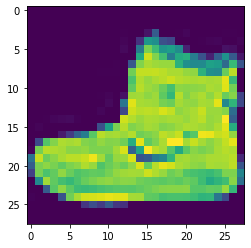

In [11]:
plt.imshow(X_train_full[0])

In [12]:
y_train_full[0]

9

In [13]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train_full[0]]

'Ankle boot'

In [15]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

# Data Normalization

In [16]:
X_train_n = X_train_full / 255.0
X_test_n = X_test / 255.0

# Splitting of data into train, test and validation datasets

In [17]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [18]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
import pydot

In [23]:
keras.utils.plot_model

<function keras.utils.vis_utils.plot_model(model, to_file='model.png', show_shapes=False, show_dtype=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96, layer_range=None, show_layer_activations=False)>

In [24]:
weights, biases = model.layers[1].get_weights()

In [25]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape

(300,)

# Compiling and Training the Model

In [29]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics=["accuracy"])

In [33]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0823 - accuracy: 0.9722 - val_loss: 0.3387 - val_accuracy: 0.8996
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0811 - accuracy: 0.9727 - val_loss: 0.3663 - val_accuracy: 0.8960
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0794 - accuracy: 0.9736 - val_loss: 0.3585 - val_accuracy: 0.8948
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0787 - accuracy: 0.9737 - val_loss: 0.3380 - val_accuracy: 0.9028
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0767 - accuracy: 0.9737 - val_loss: 0.3521 - val_accuracy: 0.9004
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0754 - accuracy: 0.9751 - val_loss: 0.3925 - val_accuracy: 0.8964
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0749 - accuracy: 0.9745 - val_loss: 0.3646 - val_accuracy:

# Model Evaluation

In [37]:
model_history.history

{'loss': [0.08230313658714294,
  0.08111349493265152,
  0.07941785454750061,
  0.07867615669965744,
  0.07674913108348846,
  0.07535041123628616,
  0.07493932545185089,
  0.07322275638580322,
  0.07093910127878189,
  0.07003553211688995,
  0.06921391934156418,
  0.06788016110658646,
  0.06734299659729004,
  0.06497643142938614,
  0.06423569470643997,
  0.0633012130856514,
  0.06174740940332413,
  0.05940116196870804,
  0.06074179336428642,
  0.05854318290948868,
  0.05774777755141258,
  0.0573282316327095,
  0.05730772390961647,
  0.055614303797483444,
  0.05469255521893501,
  0.05474625527858734,
  0.05244120582938194,
  0.05104777589440346,
  0.05070973560214043,
  0.050469908863306046],
 'accuracy': [0.9722363352775574,
  0.972672700881958,
  0.9735999703407288,
  0.973690927028656,
  0.973654568195343,
  0.9751091003417969,
  0.9744908809661865,
  0.9759636521339417,
  0.9763273000717163,
  0.9768727421760559,
  0.9764000177383423,
  0.9771272540092468,
  0.9778545498847961,
  0.97

In [38]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

<function matplotlib.pyplot.show(close=None, block=None)>

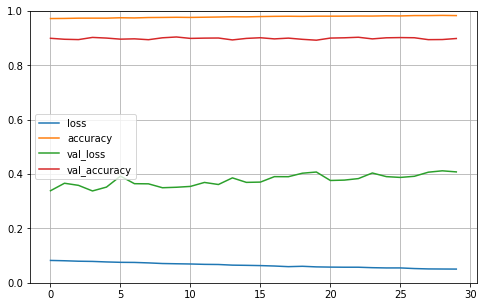

In [39]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.8940


[0.4489319324493408, 0.8939999938011169]

# Prediction on Test Dataset

In [41]:
X_new = X_test[:3]

In [42]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
y_pred = model.predict(X_new)
y_pred = np.round(y_pred).astype(int)
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [66]:
np.array(class_names[9])

array('Ankle boot', dtype='<U10')

In [67]:
np.array(class_names[2])

array('Pullover', dtype='<U8')

In [68]:
np.array(class_names[1])

array('Trouser', dtype='<U7')

AxesImage(54,36;334.8x217.44)


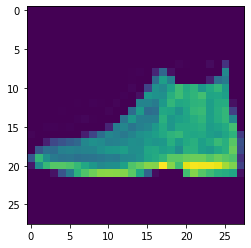

In [46]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


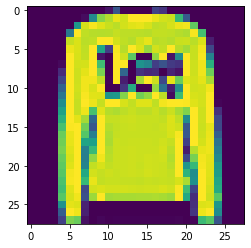

In [47]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


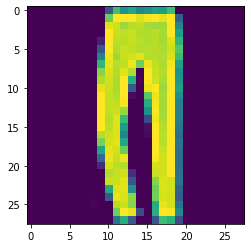

In [48]:
print(plt.imshow(X_test[2]))

Label     Description<br>
0         T-shirt<br>
1         Trouser<br>
2         Pullover<br>
3         Dress<br>
4         Coat<br>
5         Sandal<br>
6         Shirt<br>
7         Sneaker<br>
8         Bag<br>
9         Ankle boot<br>